In [2]:
#-*-coding:utf-8-*-\
import os
import random # Analysis
import datetime as dt # Analysis
import numpy as np # Analysis
import pandas as pd # Analysis
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore') # ignore warnings

# datafarme 보여주는 범위 설정

pd.options.display.max_columns=1000
pd.options.display.max_rows=200
pd.options.display.float_format = '{:.5f}'.format

In [3]:
# datafarme 보여주는 범위 설정

pd.options.display.max_columns=1000
pd.options.display.max_rows=200
pd.options.display.float_format = '{:.5f}'.format

In [4]:
df= {}

for i in range(2010, 2022):
    a = pd.read_csv("csv_in_" + str(i) + ".csv",encoding='utf-8')
    df[i] = a

In [5]:
df[2010].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326607 entries, 0 to 326606
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   신고연도      326607 non-null  int64  
 1   신고월       326607 non-null  int64  
 2   신고일       326607 non-null  int64  
 3   남편지역코드    326607 non-null  int64  
 4   아내지역코드    326607 non-null  int64  
 5   실제결혼연도    326607 non-null  int64  
 6   실제결혼월     326607 non-null  int64  
 7   남편직업코드    326607 non-null  int64  
 8   아내직업코드    326607 non-null  int64  
 9   남편교육코드    326607 non-null  int64  
 10  아내교육코드    326607 non-null  int64  
 11  남편결혼코드    326607 non-null  int64  
 12  아내결혼코드    326607 non-null  int64  
 13  남편연령      326607 non-null  float64
 14  아내연령      326607 non-null  float64
 15  남편국적구분코드  326187 non-null  float64
 16  남편국적코드    8334 non-null    object 
 17  아내국적구분코드  326187 non-null  float64
 18  아내국적코드    27318 non-null   object 
dtypes: float64(4), int64(13), object(2)
memory u

In [6]:
#2010년 외국 여성과 국제결혼한 남성의 초혼 연령의 분포는 전체 분포 또는 국내-국내 결혼과 다른 분포를 보일 것이다
d1 = {}
d2 = {}
d3 = {}
for i in range(2010,2021):
    a = df[i][(df[i]['남편국적구분코드'] == 1 )& (df[i]['아내국적구분코드'] >= 2)]
    d2[i] = a
    b = df[i][(df[i]['남편국적구분코드'] >=2) & (df[i]['아내국적구분코드'] == 1)]
    d3[i] = b
    d1[i] = pd.concat([a, b])

In [7]:
#지역 한글로변경하고싶으면 실행하셈
#지역
dic = {11:'서울', 21:'부산',22:'대구', 23:'인천',24:'광주',25:'대전',26:'울산',31:'경기도',32:'강원도', 33:'충청북도',34:'충청남도', 35:'전라북도',36:'전라남도',37:'경상북도',38:'경상남도',39:'제주도'
}
for i in range(2010,2021):
    df[i].drop(df[i][df[i]['남편지역코드'] >= 80].index, inplace=True)
    d2[i].drop(d2[i][d2[i]['남편지역코드'] >= 80].index, inplace=True)
        

In [8]:
for i in range(2010,2021):
    for j in dic.keys():
        df[i]['남편지역코드'].replace(j,dic[j], inplace=True)
        d2[i]['남편지역코드'].replace(j,dic[j], inplace=True)

In [9]:

plt.rcParams['font.family'] = 'HYGraphic-Medium'

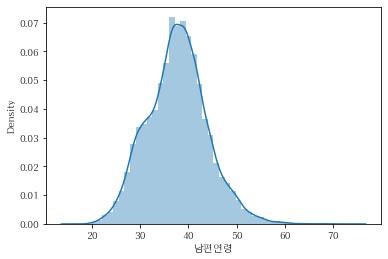

<Figure size 1296x720 with 0 Axes>

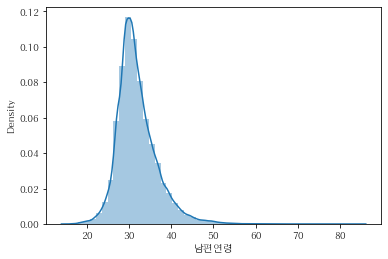

<Figure size 1296x720 with 0 Axes>

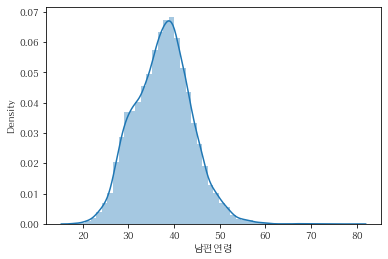

<Figure size 1296x720 with 0 Axes>

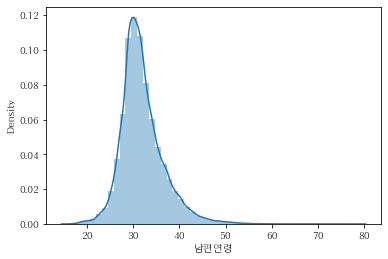

<Figure size 1296x720 with 0 Axes>

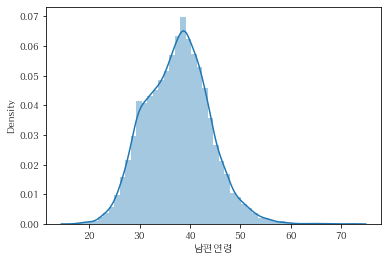

<Figure size 1296x720 with 0 Axes>

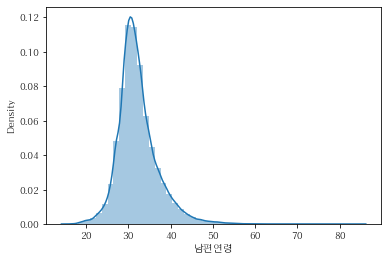

<Figure size 1296x720 with 0 Axes>

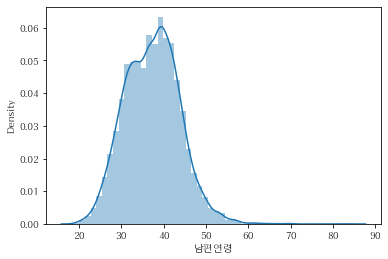

<Figure size 1296x720 with 0 Axes>

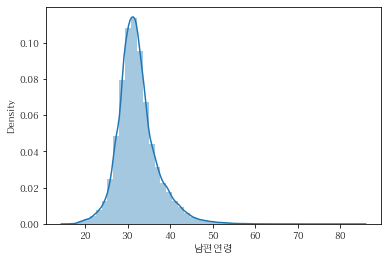

<Figure size 1296x720 with 0 Axes>

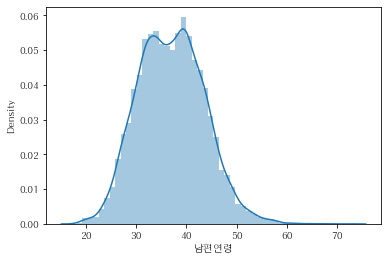

<Figure size 1296x720 with 0 Axes>

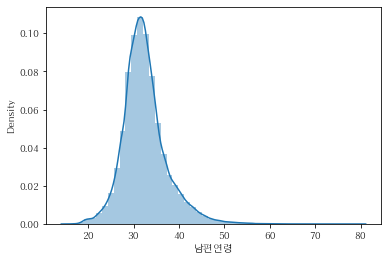

<Figure size 1296x720 with 0 Axes>

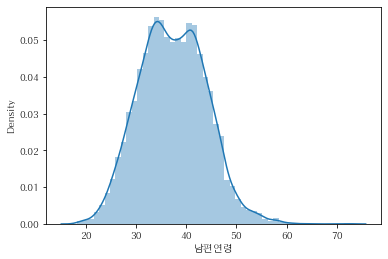

<Figure size 1296x720 with 0 Axes>

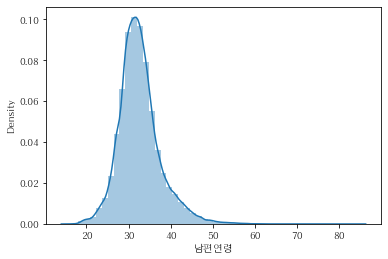

<Figure size 1296x720 with 0 Axes>

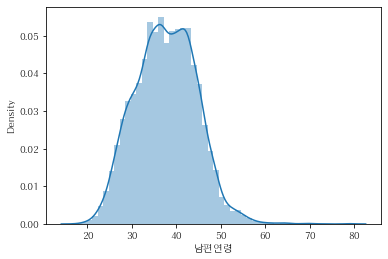

<Figure size 1296x720 with 0 Axes>

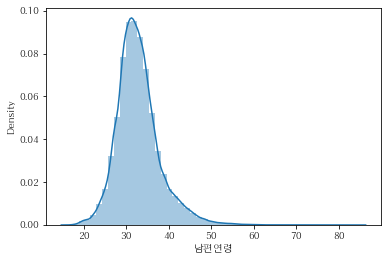

<Figure size 1296x720 with 0 Axes>

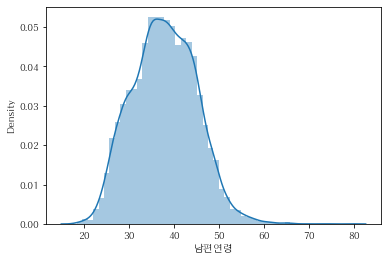

<Figure size 1296x720 with 0 Axes>

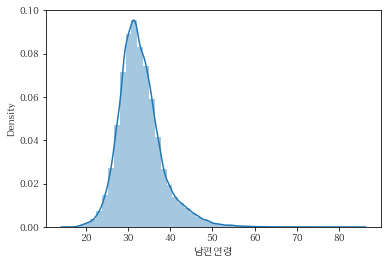

<Figure size 1296x720 with 0 Axes>

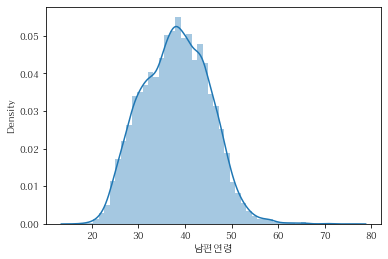

<Figure size 1296x720 with 0 Axes>

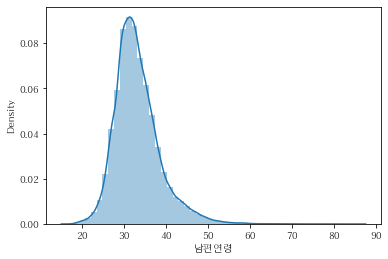

<Figure size 1296x720 with 0 Axes>

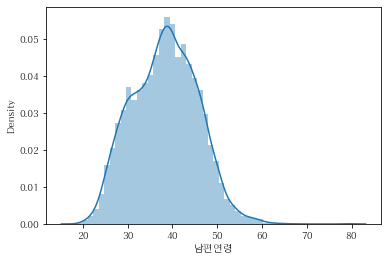

<Figure size 1296x720 with 0 Axes>

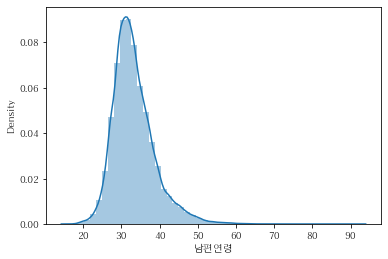

<Figure size 1296x720 with 0 Axes>

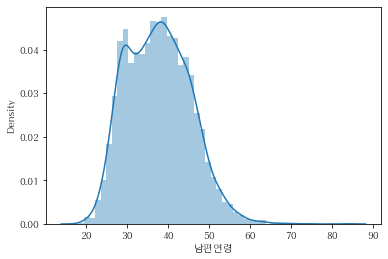

<Figure size 1296x720 with 0 Axes>

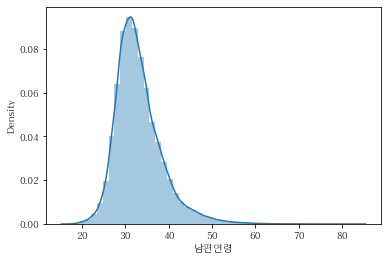

<Figure size 1296x720 with 0 Axes>

In [10]:

for i in range(2010,2021):
    sns.distplot(d2[i]['남편연령'][d2[i]['남편결혼코드'] == 1], kde = True)
    plt.figure(figsize=(18,10))
    plt.show()
    sns.distplot(df[i][df[i]['남편결혼코드'] == 1]['남편연령'], kde = True )
    plt.figure(figsize=(18,10))
    plt.show()
#결론: 남성 국제결혼자의 분포는 쌍봉분포로 보이며, 평균이 전체 분포에 비해 엄청 높지만, 여성 국제결혼자는 일반적인 케이스와 분포가 다르지 않다.

#가설: 대졸 평균과 크게 차이나지 않는 분포로 이루어진 연애결혼 분포와(국제연애결혼은 언어 때문에라도 교육장벽이 있으니), 매매결혼 분포로 나눌 수 있을 것이다

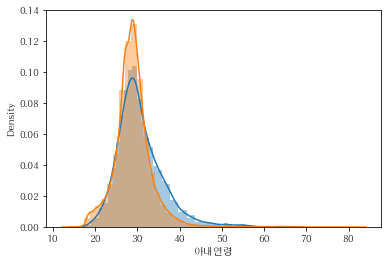

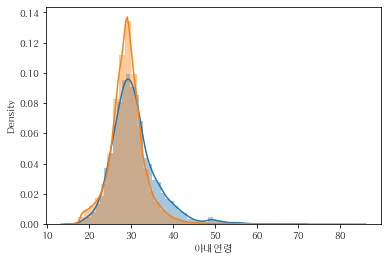

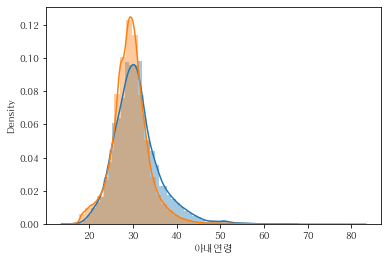

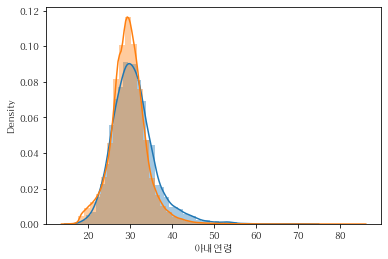

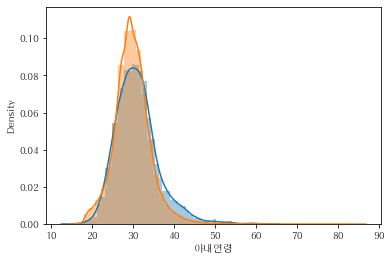

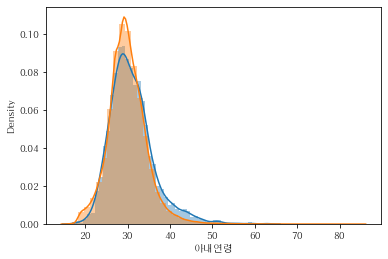

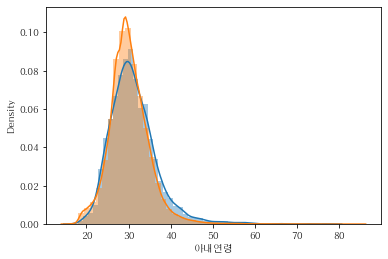

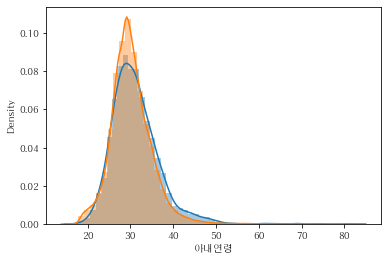

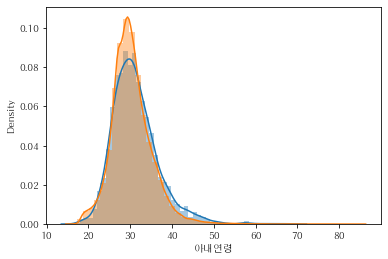

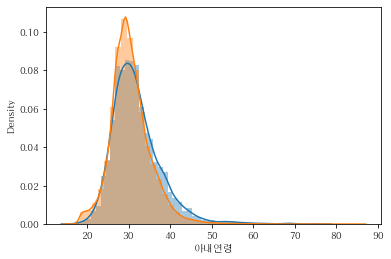

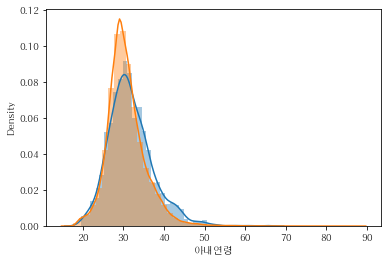

In [11]:
#여성 국제결혼자 분포 보는 코드
for i in range(2010,2021):
    sns.distplot(d3[i]['아내연령'][d3[i]['아내결혼코드'] == 1],kde = True)
    sns.distplot(df[i][df[i]['아내결혼코드'] == 1]['아내연령'],kde = True)
    plt.show()

16026
12111


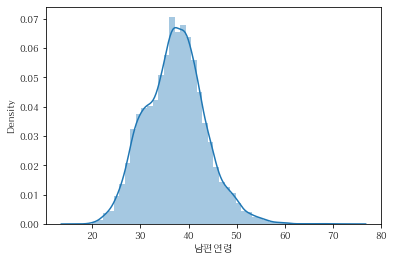

13999
10755


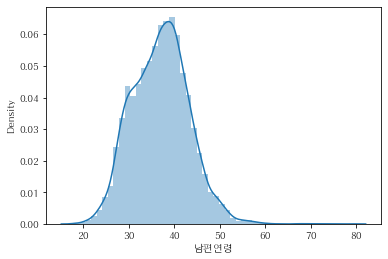

12862
9801


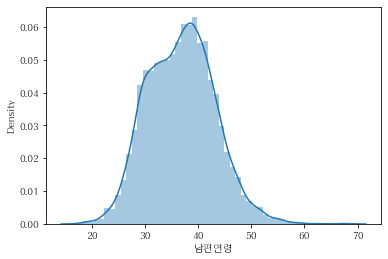

11498
8804


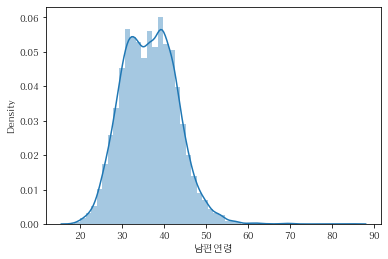

10398
8079


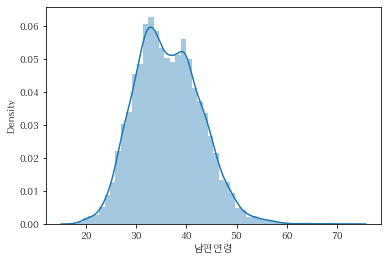

9466
7304


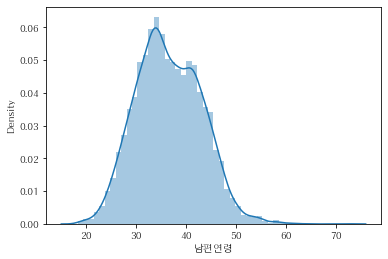

9551
7406


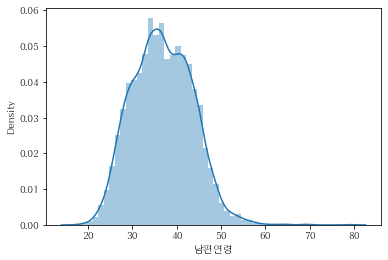

9208
7198


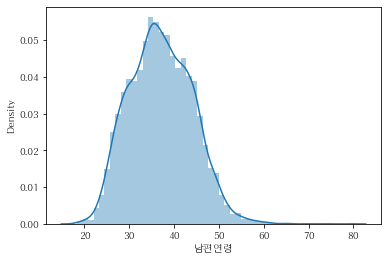

10058
7569


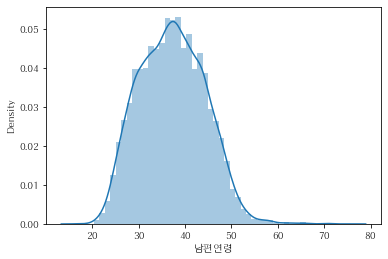

9896
7511


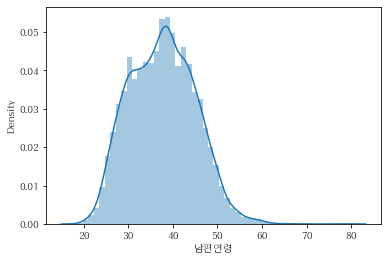

5062
3995


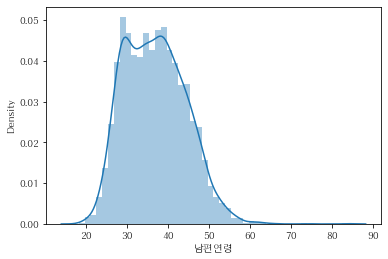

In [17]:
#직업별 분석
for i in range(2010,2021):
    print(len(d2[i][d2[i]['남편결혼코드'] == 1]))
    print(len(d2[i][(d2[i]['남편결혼코드'] == 1)&(d2[i]['남편직업코드'] != 6)&(d2[i]['남편직업코드'] != 7)&(d2[i]['남편직업코드'] != 9)]))
    sns.distplot(d2[i][(d2[i]['남편결혼코드'] == 1)&(d2[i]['남편직업코드'] != 6)&(d2[i]['남편직업코드'] != 7)&(d2[i]['남편직업코드'] != 9)]['남편연령'], kde = True)
    plt.show()
    #농업, 단순노동자, 기능원 은 국제결혼 분포 중 40이 평균인 분포 소속임이 확실하나, 그 여집단이 분포 중 평균이 33 근처인 분포 소속인 건 아님. 

<AxesSubplot:xlabel='남편연령', ylabel='Density'>

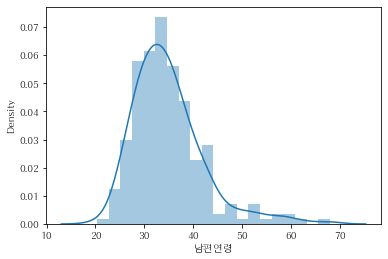

In [33]:
sns.distplot(d2[2019][(d2[2019]['아내국적코드'] == '1119')|(d2[2019]['남편결혼코드'] == '1')]['남편연령']) #대만은 30대 쪽에 가까움

<AxesSubplot:xlabel='남편연령', ylabel='Density'>

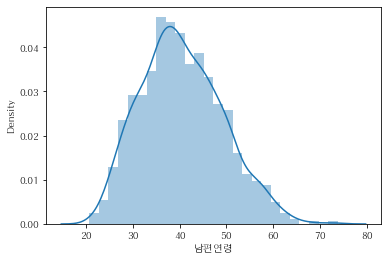

In [34]:
sns.distplot(d2[2019][(d2[2019]['아내국적코드'] == '1313')|(d2[2019]['남편결혼코드'] == '1')]['남편연령']) #태국은 애매 but 30대극후반쪽

<AxesSubplot:xlabel='남편연령', ylabel='Density'>

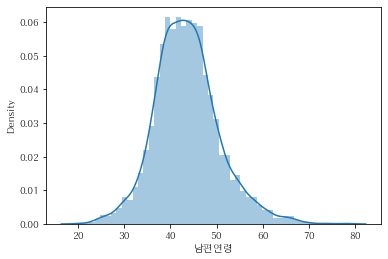

In [36]:
sns.distplot(d2[2019][(d2[2019]['아내국적코드'] == '1151')|(d2[2019]['남편결혼코드'] == '1')]['남편연령']) #베트남#40대초반쪽

<AxesSubplot:xlabel='남편연령', ylabel='Density'>

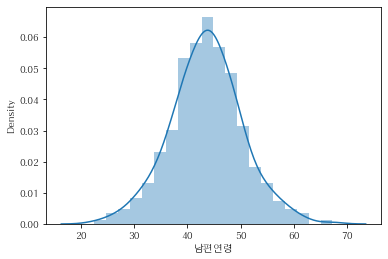

In [21]:
sns.distplot(d2[2019][d2[2019]['아내국적코드'] == '1164']['남편연령'])# 캄보디아 #40대중반쪽

<AxesSubplot:xlabel='남편연령', ylabel='Density'>

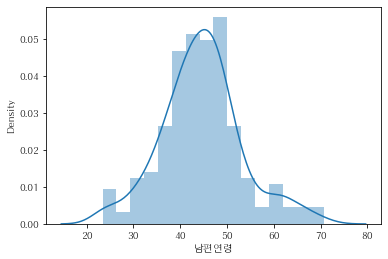

In [22]:
sns.distplot(d2[2019][d2[2019]['아내국적코드'] == '2451']['남편연령']) #우즈베키스탄 

<AxesSubplot:xlabel='남편연령', ylabel='Density'>

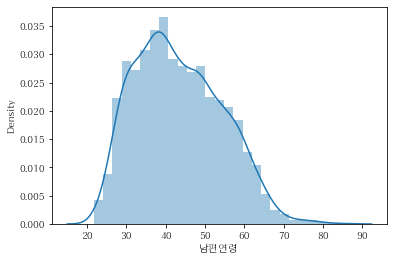

In [23]:
sns.distplot(d2[2019][(d2[2019]['아내국적코드'] == '1931')|]['남편연령']) #중국

<AxesSubplot:xlabel='남편연령', ylabel='Density'>

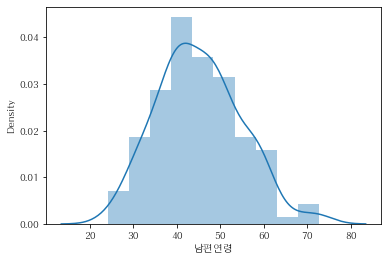

In [24]:
sns.distplot(d2[2019][d2[2019]['아내국적코드'] == '1928']['남편연령'])

<AxesSubplot:xlabel='남편연령', ylabel='Density'>

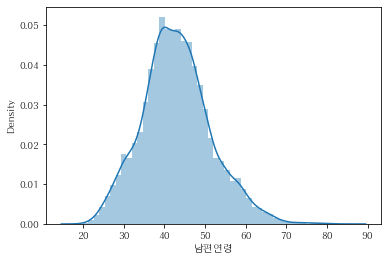

In [25]:
sns.distplot(d2[2019][(d2[2019]['아내국적코드'] == '1313')|(d2[2019]['아내국적코드'] == '1122')|(d2[2019]['아내국적코드'] == '1151')|(d2[2019]['아내국적코드'] == '1164')|(d2[2019]['아내국적코드'] == '1313')|(d2[2019]['아내국적코드'] == '1164')|(d2[2019]['아내국적코드'] == '1928')|(d2[2019]['아내국적코드'] == '1931')]['남편연령'])

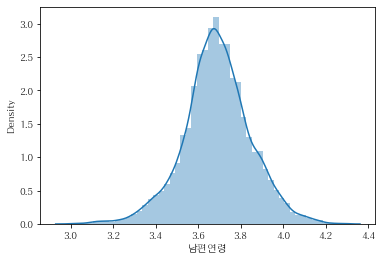

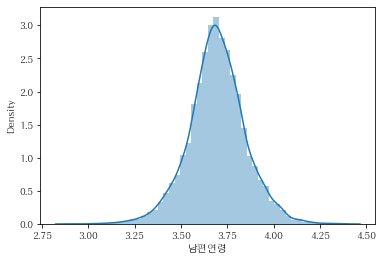

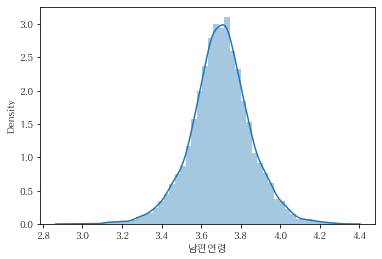

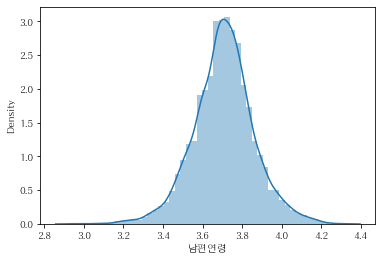

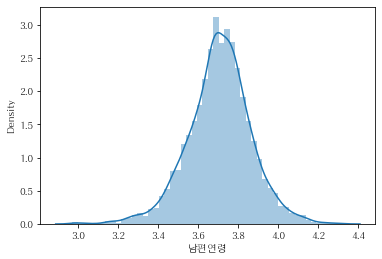

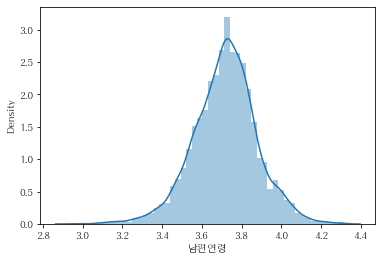

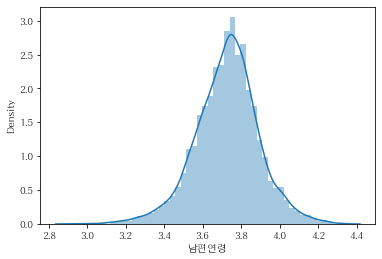

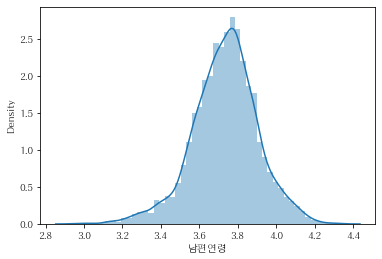

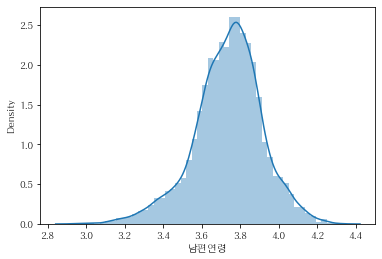

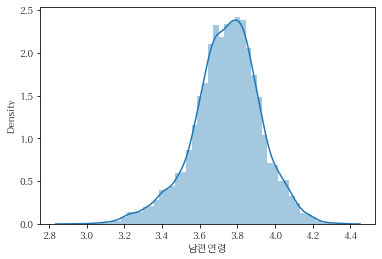

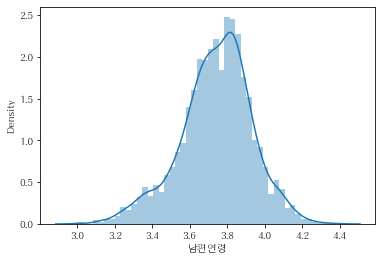

In [26]:
d4 = {}
for i in range(2010,2021):
    d4[i] =d2[i][(d2[i]['아내국적코드'] == '1313')|(d2[i]['아내국적코드'] == '1122')|(d2[i]['아내국적코드'] == '1151')|(d2[i]['아내국적코드'] == '1164')|(d2[i]['아내국적코드'] == '1313')|(d2[i]['아내국적코드'] == '1164')|(d2[i]['아내국적코드'] == '1928')|(d2[i]['아내국적코드'] == '1931')]
    sns.distplot(d2[i][(d2[i]['아내국적코드'] == '1313')|(d2[i]['아내국적코드'] == '1122')|(d2[i]['아내국적코드'] == '1151')|(d2[i]['아내국적코드'] == '1164')|(d2[i]['아내국적코드'] == '1313')|(d2[i]['아내국적코드'] == '1164')|(d2[i]['아내국적코드'] == '1928')]['남편연령'].apply(np.log))
    plt.show()
    #야매로라도 국가에 따라 쪼개보자

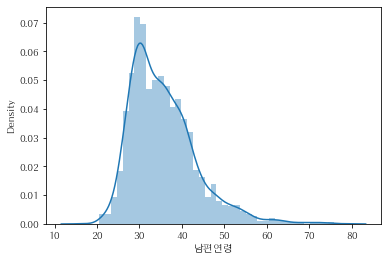

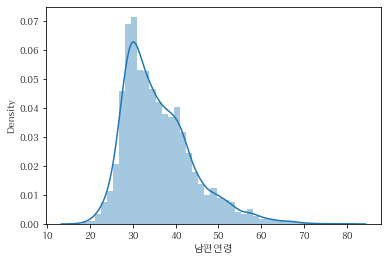

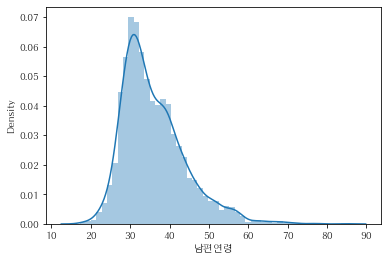

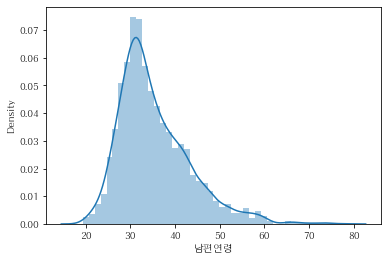

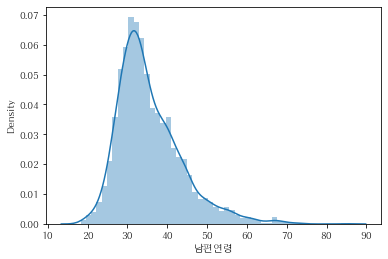

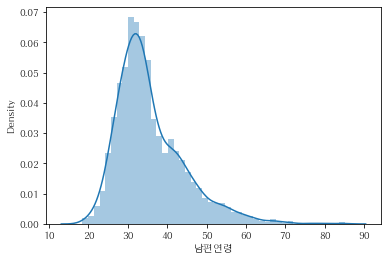

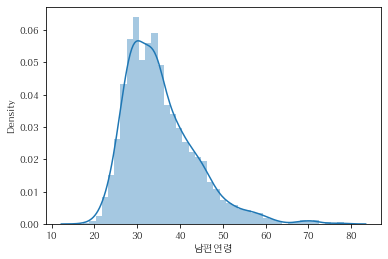

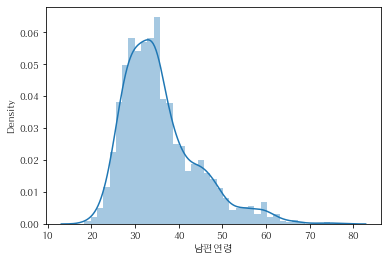

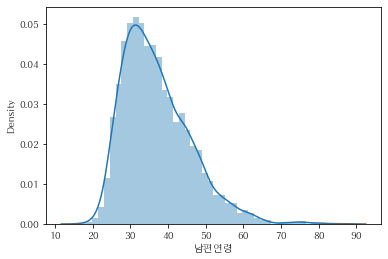

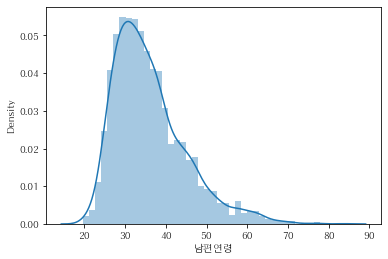

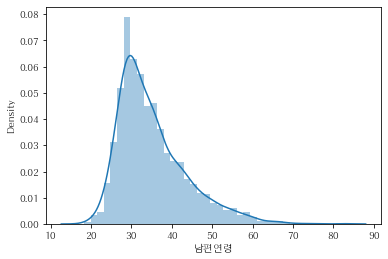

In [27]:

for i in range(2010,2021):
    sns.distplot(d2[i][(d2[i]['아내국적코드'] != 'NaN')&(d2[i]['아내국적코드'] != '1313')&(d2[i]['아내국적코드'] != '1122')&(d2[i]['아내국적코드'] != '1151')&(d2[i]['아내국적코드'] != '1164')&(d2[i]['아내국적코드'] != '1313')&(d2[i]['아내국적코드'] != '1164')&(d2[i]['아내국적코드'] != '1928')&(d2[i]['아내국적코드'] != '1931')]['남편연령'])
    plt.show()

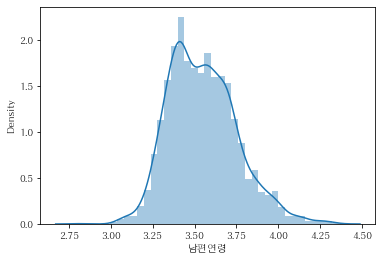

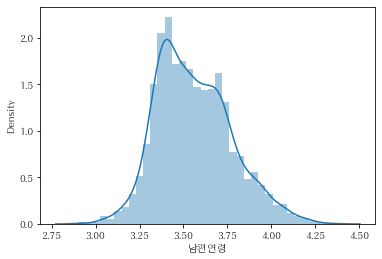

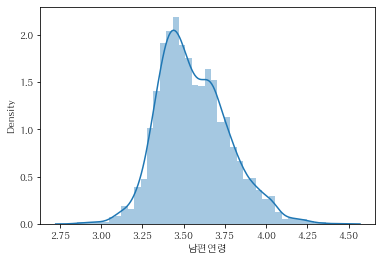

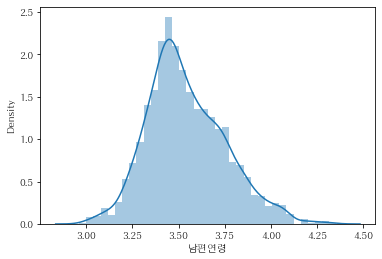

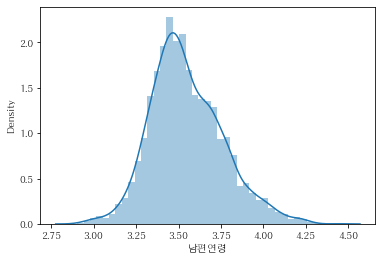

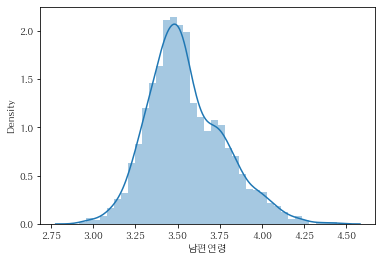

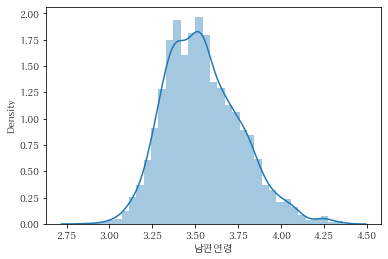

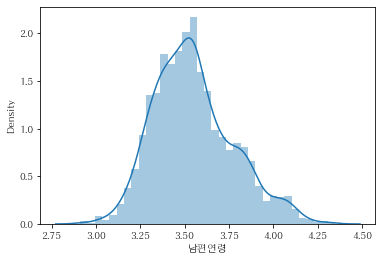

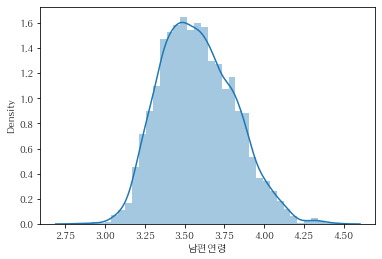

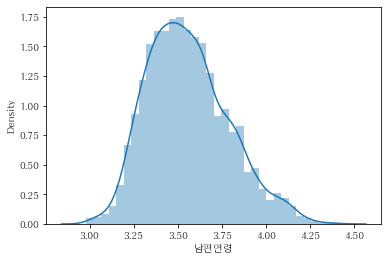

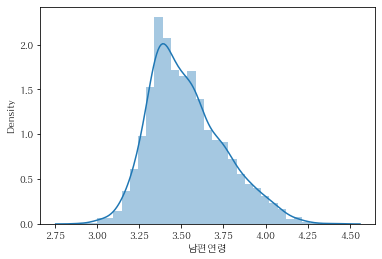

In [28]:
d5 = {}
for i in range(2010,2021):
    d5[i] = d2[i][(d2[i]['아내국적코드'] != 'NaN')&(d2[i]['아내국적코드'] != '1313')&(d2[i]['아내국적코드'] != '1122')&(d2[i]['아내국적코드'] != '1151')&(d2[i]['아내국적코드'] != '1164')&(d2[i]['아내국적코드'] != '1313')&(d2[i]['아내국적코드'] != '1164')&(d2[i]['아내국적코드'] != '1928')&(d2[i]['아내국적코드'] != '1931')]
    sns.distplot(d2[i][(d2[i]['아내국적코드'] != 'NaN')&(d2[i]['아내국적코드'] != '1313')&(d2[i]['아내국적코드'] != '1122')&(d2[i]['아내국적코드'] != '1151')&(d2[i]['아내국적코드'] != '1164')&(d2[i]['아내국적코드'] != '1313')&(d2[i]['아내국적코드'] != '1164')&(d2[i]['아내국적코드'] != '1928')&(d2[i]['아내국적코드'] != '1931')]['남편연령'].apply(np.log))
    plt.show()
# 로그정규라 하기도 애매하네..

In [29]:
d4[2019].groupby('남편직업코드').count()

,신고연도,신고월,신고일,남편지역코드,아내지역코드,실제결혼연도,실제결혼월,아내직업코드,남편교육코드,아내교육코드,남편결혼코드,아내결혼코드,남편연령,아내연령,남편국적구분코드,남편국적코드,아내국적구분코드,아내국적코드
남편직업코드,,,,,,,,,,,,,,,,,,
1,1245,1245,1245,1245,1245,1245,1245,1245,1245,1245,1245,1245,1245,1245,1245,0,1245,1245
2,1594,1594,1594,1594,1594,1594,1594,1594,1594,1594,1594,1594,1594,1594,1594,0,1594,1594
3,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273,0,1273,1273
5,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,2556,0,2556,2556
6,594,594,594,594,594,594,594,594,594,594,594,594,594,594,594,0,594,594
7,1973,1973,1973,1973,1973,1973,1973,1973,1973,1973,1973,1973,1973,1973,1973,0,1973,1973
8,739,739,739,739,739,739,739,739,739,739,739,739,739,739,739,0,739,739
9,749,749,749,749,749,749,749,749,749,749,749,749,749,749,749,0,749,749
13,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,0,210,210


In [30]:
d5[2019].groupby('남편직업코드').count()

,신고연도,신고월,신고일,남편지역코드,아내지역코드,실제결혼연도,실제결혼월,아내직업코드,남편교육코드,아내교육코드,남편결혼코드,아내결혼코드,남편연령,아내연령,남편국적구분코드,남편국적코드,아내국적구분코드,아내국적코드
남편직업코드,,,,,,,,,,,,,,,,,,
1,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,0,296,296
2,695,695,695,695,695,695,695,695,695,695,695,695,695,695,695,0,695,695
3,658,658,658,658,658,658,658,658,658,658,658,658,658,658,658,0,658,658
5,602,602,602,602,602,602,602,602,602,602,602,602,602,602,602,0,602,602
6,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,0,66,66
7,227,227,227,227,227,227,227,227,227,227,227,227,227,227,227,0,227,227
8,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,0,97,97
9,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,0,91,91
13,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,0,194,194


'초혼연령의 관점에서 본 국제결혼자들의 특성 분석' 
0. 국제결혼을 통계적으로 접근
1.남성 국제결혼자들을 두 집단으로 분리
2. 코로나 이전이후 국제결혼자들의 특성 분석
3. 특히 중국을 분석


스토리생각: 국제결혼 양상은 시대에 따라 변화했는데 그에 대한 전체적인 통계에 대한 연구가 부족했다, 국제결혼이 연애결혼과 매매혼 두 부류로 나눠짐이 통념이지만 두 분포를 나누려는 시도는 외국엔 있는데 한국엔 없다 머 이런거
농촌 편중이 약해진 부분 지적
직업 편중이 약해진 부분 지적
